# Plotting
Here we explain the low-end interface for plotting with plotastic.

### Import plotastic and example Data

In [1]:
import plotastic as plst

# Import Example Data
DF, _dims = plst.load_dataset("fmri", verbose = False)

DF.head()

,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


### Make DataAnalysis Object

In [2]:
dims = dict(
    y= 'signal', 
    x= 'timepoint',
    hue= 'event', 
    col= 'region',
)

DA = plst.DataAnalysis(
    data=DF,           # Dataframe
    dims=dims,         # Dictionary with y, x, hue, col, row 
    subject="subject", # Data is paired by subject (optional)
    verbose=True,      # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


### Reminder: Use pre-defined MultiPlots!
Before we go through the low-end plotting functionality, note that we
have high-end plotting functionality that is pre-defined for you. See
multiplots for a demonstration of all of these functions!


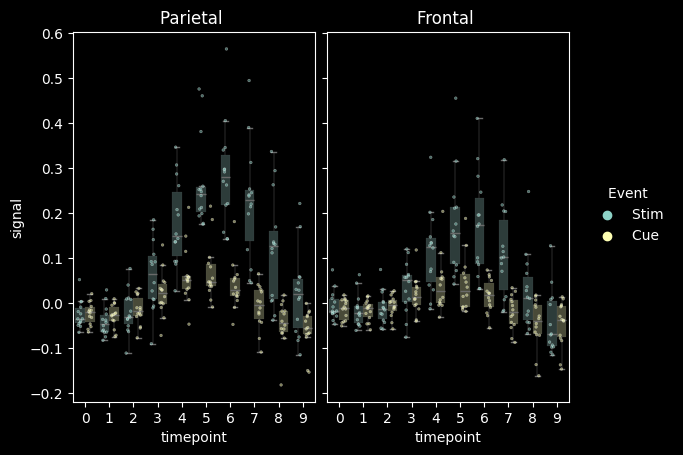

In [3]:
DA.plot_box_strip()

## Low-Level Plotting
This gives you most control over your plot by wrapping up common
`matplotlib` and `seaborn` functions, allowing you to pass parameters and
override those specified by plotastic

### Initialize a `matplotlib` plot
Plots are initialized with `matplotlib`'s `plt.subplots` function. This
returns a `matplotlib` figure and axes object. 

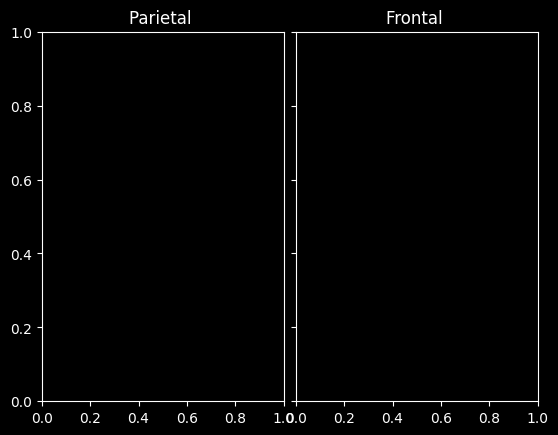

In [4]:
DA.subplots()

#### Pass parameters to `plt.subplots`

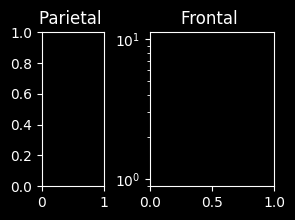

In [5]:
DA.subplots(
    sharey=False,
    y_scale="log",
    wspace=0.5,             # Space between columns
    width_ratios=[1, 2],    # Width of columns
    # height_ratios=[1, 2], # Height of rows, Can't use when only columns!
    figsize=(3, 2),        # Figure Size
    
)

### Fill subplots with plots
Fill the initialized axes using `seaborn` functions and their parameters

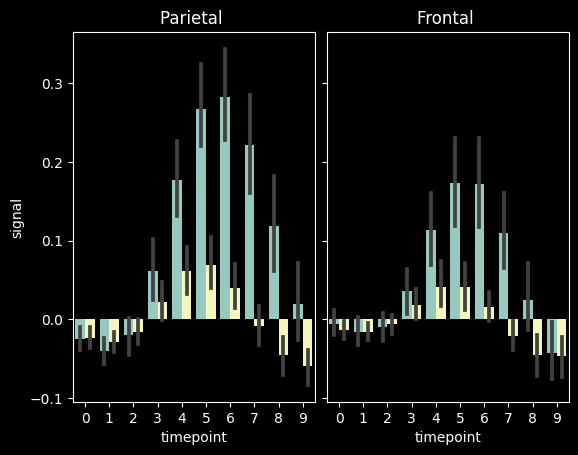

In [6]:
DA.subplots().fillaxes(kind="bar")

#### Pass `seaborn` parameters to `seaborn` functions

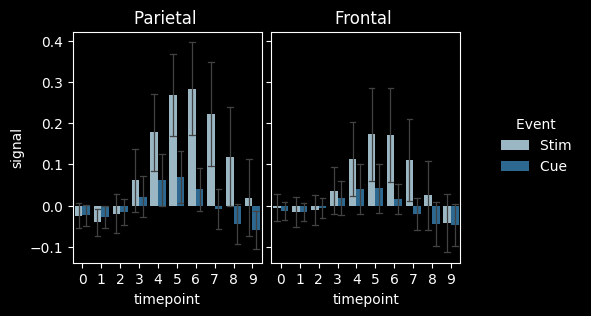

In [50]:
(DA
 .subplots(figsize=(5, 3))
 .fillaxes(
    kind="bar",
    
    ### Errorbars:
    errorbar="sd", # Show standard deviation, default is confidence intervals
    # !! For seaborn version 0.13:
    # err_kws=dict(lw=2, capsize=5, capthick=2, ecolor="black",) 
    # !! For seaborn version 0.12:
    errwidth=.9, capsize=.3,
    
    ### Colors:
    alpha=0.9,
    palette="Paired",
    
    ### Use anything from seaborn.barplot()!
    )
 .edit_legend(pad=.3) # Legends need explicit addition
)

#### Chain plotting functions for overlaying plots

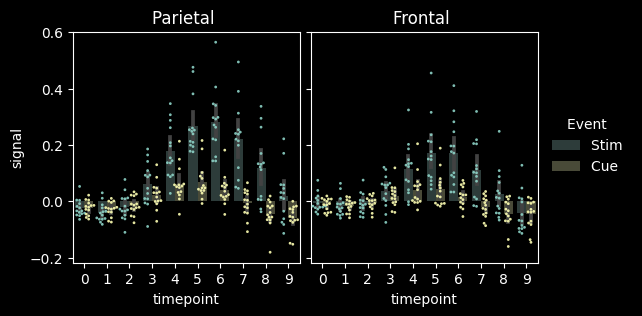

In [55]:
(DA
 .subplots(figsize=(6, 3))
 .fillaxes(kind="bar", alpha=.3)
 .fillaxes(kind="swarm", s=2, alpha=.9, dodge=True)
 .edit_legend()
)